In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Nesse breve tutorial, vamos ver 11 tipos de gráficos, trazendo informações referentes a  função de cada gráfico e como obtê-los. <br><br>

<b>Os gráficos a seguir são representações visuais de dados e têm o objetivo de falicitar e acelerar nossa compreensão, por isso, antes de plotar os dados, devemos obter os dados que serão utilizados.  

Nosso primeiro grupo de gráficos vai utilizar informações referentes a gorjetas (inglês: tips). Os atributos desse dataset são: 

- total_bill => valor da conta total
- tip => valor da gorjeta
- sex => gênero do consumidor
- smoker => se o consumidor é fumante ou não
- day => dia da semana
- time => que tipo de refeição (jantar, almoço...)
- size => quantidade de pessoas na mesa

In [2]:
gorjetas = sns.load_dataset('tips')
gorjetas.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1) DISTPLOT

Mostra a distribuição de UMA variável numérica (pode ser contínua, discreta ou categórica), o eixo X representa o valor da variável e o eixo Y representa a frequencia

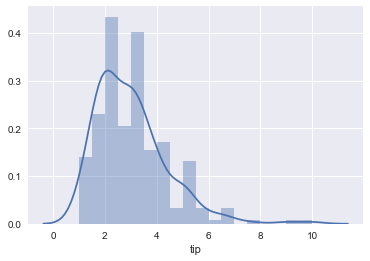

In [3]:
sns.distplot(gorjetas['tip'])

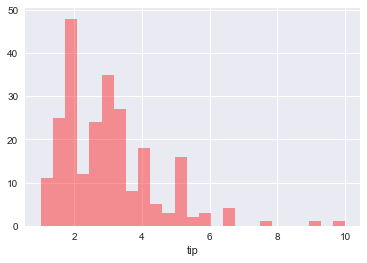

In [4]:
# Essa linha azul escura do gráfico acima chama-se estimativa de densidade kernel(sigla em inglês: kde) -> para removê-la, 
# mudar de cor do gráfico e escolher a quantidade de barras, usamos os seguintes parâmetros:

sns.distplot(gorjetas['tip'], kde = False, color ='red', bins = 25)

Para saber mais sobre kde, leia <a href="https://pt.wikipedia.org/wiki/Estimativa_de_densidade_kernel"> essa página.</a>

### 2) JOINTPLOT

Mostra a relação entre duas variáveis, apresentando o coeficiente de Pearson que varia de -1 a 1.<br>
Quanto mais próximo de 1, maior é a correlação positiva entre elas; = => "Quando uma aumenta a outra também aumenta"<br>
Quanto mais próximo de -1, maior é a correlação negativa entre elas; => "Quando uma aumenta a outra diminui"<br>
Quanto mais próximo de 0, menor é a correlação positiva entre elas.

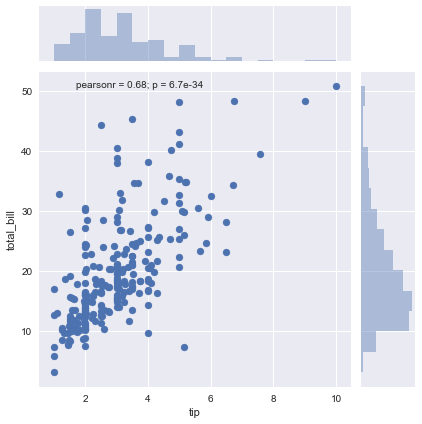

In [5]:
sns.jointplot(x='tip', y='total_bill', data= gorjetas)

Por padrão, o tipo de gráfico do jointplot é de dispersão ('scatter'), mas temos outras opções, como 'kde', 'reg', 'resid' e 'hex' 

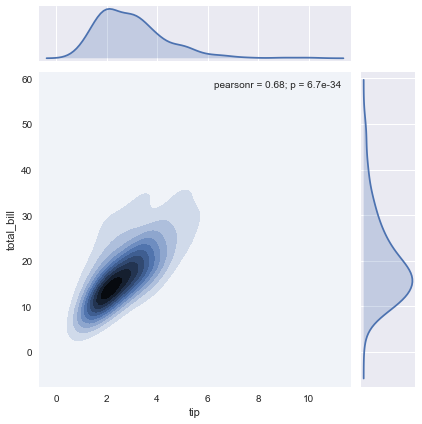

In [6]:
sns.jointplot(x='tip', y='total_bill', data= gorjetas, kind='kde')

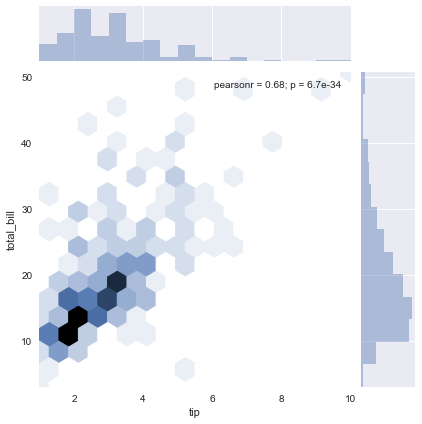

In [7]:
sns.jointplot(x='tip', y='total_bill', data= gorjetas, kind='hex')

### 3) PAIRPLOT

Esse gráfico faz a correlação de todos os atributos do dataset entre si, apenas as variáveis numéricas.
Na minha opinião, esse é o gráfico que mais simboliza o "poder" de Seaborn, veja a quantidade de informações que a gente consegue obter com apenas uma linha de código. 

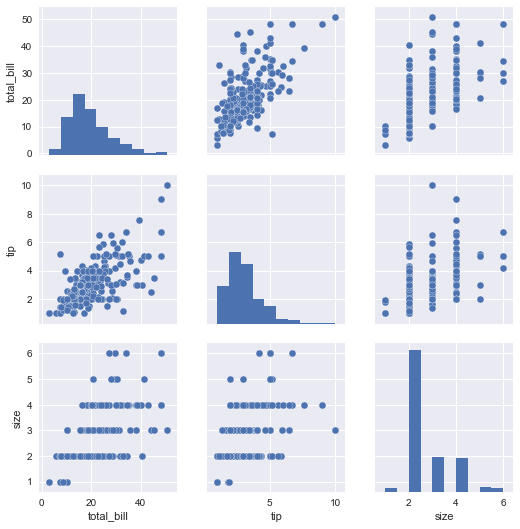

In [8]:
sns.pairplot(gorjetas)

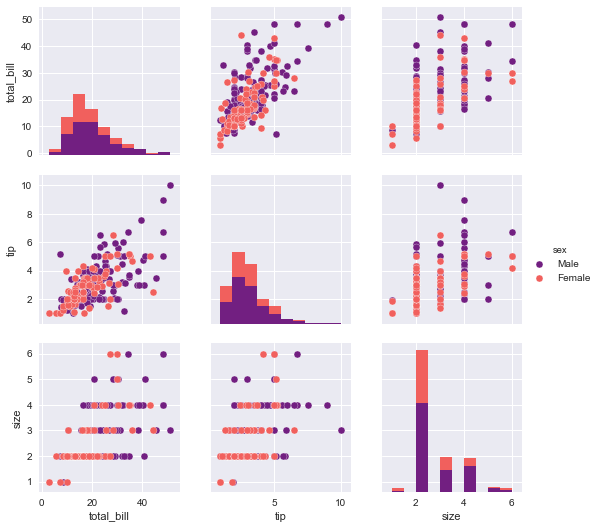

In [9]:
# Caso exista tenha uma variável categórica, podemos usá-la para separar a visualização das categorias por cores
# Para personalizar ainda mais as cores, temos várias opções de 'palette': viridis, plasma, coolwarm, rainbow, Set1, Set2,  etc

sns.pairplot(gorjetas, hue='sex', palette='magma')

### 4) BARPLOT

É um bom gráfico para ser usado quando trabalhamos com variáveis categóricas. O barplot agrupa as diferentes categorias no eixo x e plota o gráfico baseado em determinada função (parâmetro <i>estimator</i>), que por padrão é a média aplicada ao parâmetro do eixo y. Entenda mais no exemplo:

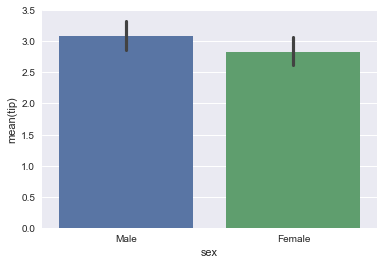

In [10]:
# Passamos a variável categórica no eixo x -> sexo. No eixo y, escolhemos o valor da gorjeta. Seaborn então vai calcular
# a média da gorjeta para cada sexo e plotar no gráfico
sns.barplot(x='sex', y='tip' , data=gorjetas)

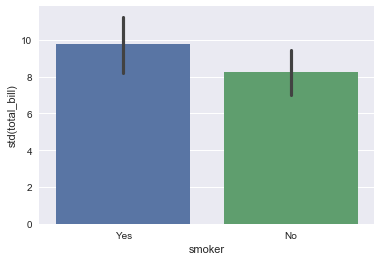

In [11]:
# Outro exemplo mudando o 'estimator' de média para desvio padrão e mudando, também, as outras variáveis, mas sempre com uma
# variável categórica no eixo x

sns.barplot(x='smoker', y='total_bill', data= gorjetas, estimator=np.std)

### 5) COUNTPLOT

O countplot é o mesmo que o barplot, com a diferença que o estimator é sempre a contagem da ocorrência da variável categórica escolhida, por isso só precisamos passar o x

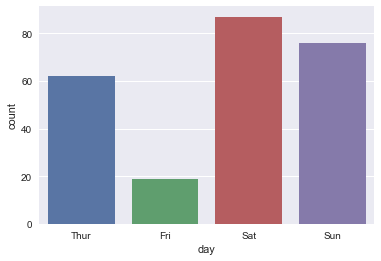

In [12]:
# Quantidade de gorjetas por dia

sns.countplot(x=gorjetas['day'])

# a linha acima produz o mesmo resultado que:

sns.countplot(x='day', data= gorjetas)

### 6) BOXPLOT

Mostra os quartis de distribuição de dados quantitativos. Entenda a estrutura de um boxplot através deste gráfico que eu achei em <u>www.portalaction.com.br

![Image](http://www.portalaction.com.br/sites/default/files/resize/EstatisticaBasica/figuras/boxplot1-700x354.png)

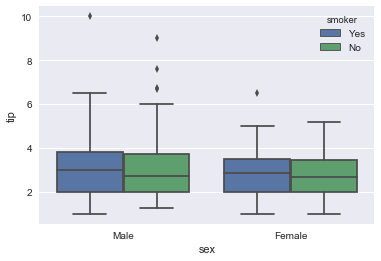

In [13]:
sns.boxplot(x='sex', y='tip', data=gorjetas, hue='smoker')

### 7) LMPLOT

Seu objetivo é fornecer uma interface com modelos de regressão aplicados em atributos de um dataset

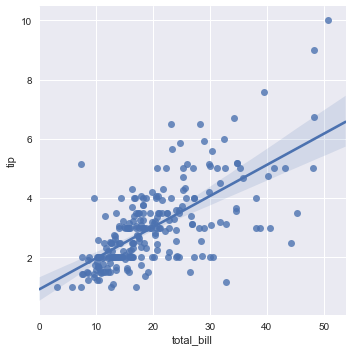

In [14]:
g = sns.lmplot(x="total_bill", y="tip", data=gorjetas, palette="Set1")

Podemos usar os parâmetros opcionais 'col' e 'row' se quisermos plotar mais informações em diferentes colunas e linhas, respectivamente  

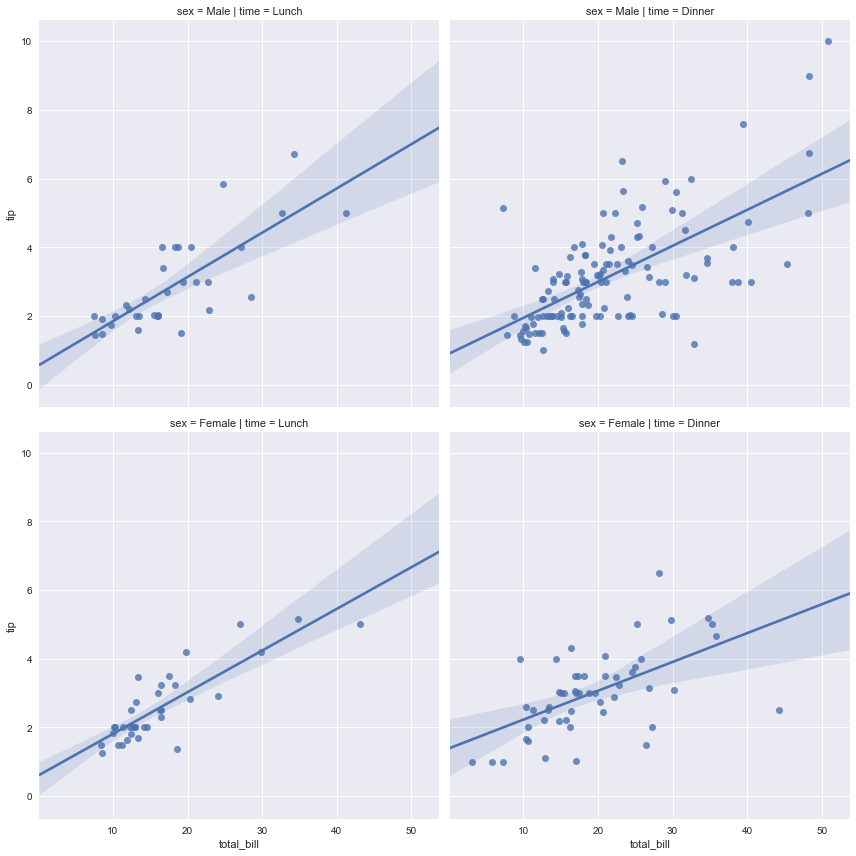

In [15]:
#size: escolhe o tamanho do gráfico

sns.lmplot(x="total_bill", y="tip", row="sex", col="time", data=gorjetas, size=6)

### 8) HEATMAP

É um gráfico que mostra a correlação entre todas as variáveis, mudando a cor conforme o grau de correlação. <br>
Para utilizar esse gráfico (e também o clustermap), é preciso que seus dados estejam em forma de matriz. Vou mostrar <b>duas</b> maneira de fazer isso: <br>
<b>1 ) </b> A maneira mais fácil de fazer isso é utilizar a função .corr()

In [16]:
# Perceba que a função exclui automaticamente as variáveis não numéricas

gorjetas.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


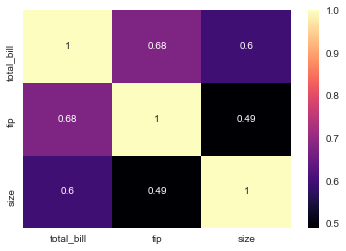

In [17]:
# annot= True: para mostrar o coeficiente em cada célula respectiva 
# cmap: personaliza as cores, opções: magma, plasma, viridis, coolwarm, inferno...

sns.heatmap(gorjetas.corr(), annot= True, cmap='magma')

Para mostrar o próximo gráfico, vou utilizar outro dataset referente a histórico de vôos. Ele é mais simples, demostra apenas a quantidade de passageiros em determinado mês e ano.

In [18]:
voos = sns.load_dataset('flights')
voos.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


<b>2 )</b> A segunda maneira de mudar seus dados para um formato de matriz (com as variáveis desejadas tanto no índice, quanto na coluna) é através da função .pivot_table()

In [19]:
voos = voos.pivot_table(values='passengers', columns='year', index='month')
voos

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


### 9) CLUSTERMAP

Clustermap agrupa dados semelhantes por proximidade e cor, produzindo uma cadeia hierárquica.
Perceba que no gráfico abaixo, os meses do meio do ano (junho, julho e agosto) estão agrupados e possuem cor mais escura,
denotando valores maiores. O mesmo occore com os anos mais recentes.

C:\Users\lbour\Anaconda3\envs\k35\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


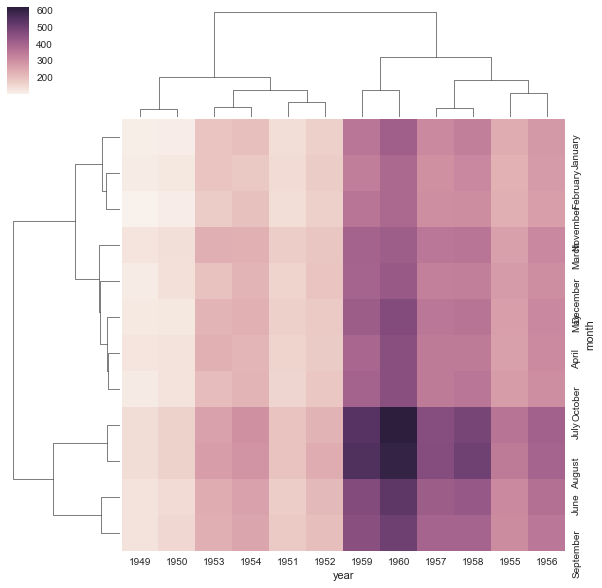

In [20]:
sns.clustermap(voos)

<br>Na sequência, mostraremos dois gráficos diferentes em formato de grade (inglês: <i>grid</i>), o PairGrid e o FacetGrid. 

### 10) PAIRGRID

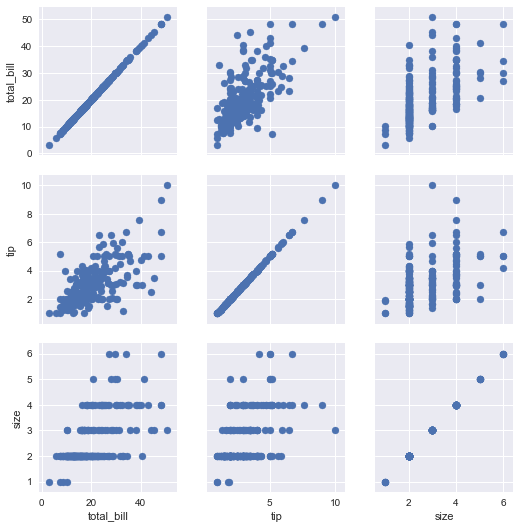

In [21]:
g = sns.PairGrid(gorjetas)   # essa linha forma apenas a grade
g.map(plt.scatter)           # essa linha plota o tipo de gráfico desejado na grade

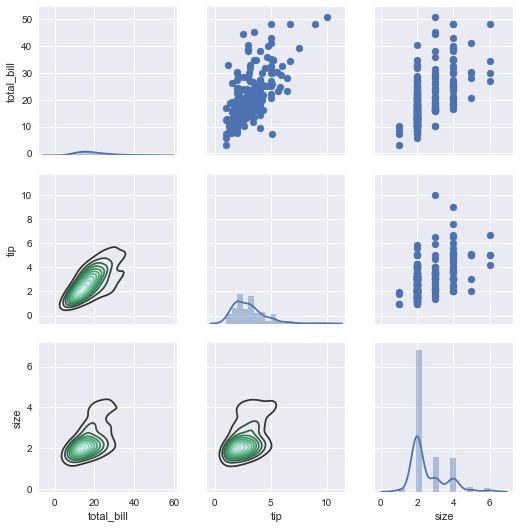

In [22]:
# Também é possível especificar diferente tipos de gráfico a ser plotado na diagonal da grade, na parte de cima e de baixo

g = sns.PairGrid(gorjetas)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

### 11) FACETGRID

Usado para plotar gráficos com múltiplos eixos, onde cada eixo mostra uma relação condicionada em diferentes níveis de uma variável

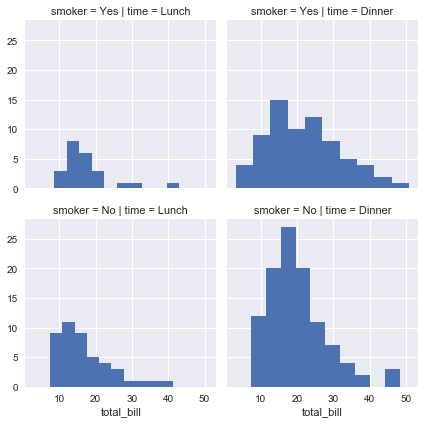

In [23]:
# A implementação é similar ao PairGrid

g = sns.FacetGrid(gorjetas, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill")

# DICAS DE ESTILO E PERSONALIZAÇÃO

Para mudar o fundo do gráfico, temos as seguintes opções: darkgrid, whitegrid, dark, white, ticks

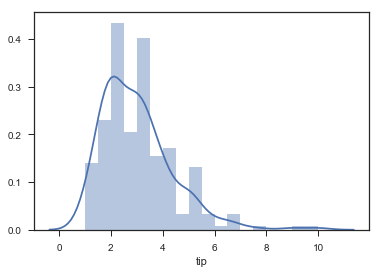

In [24]:
sns.set_style('ticks')
sns.distplot(gorjetas['tip'])

sns.despine: remove as linhas superior e direita, podemos especificar as outras linhas passando booleanos para os parâmetros: left, bottom, top, right

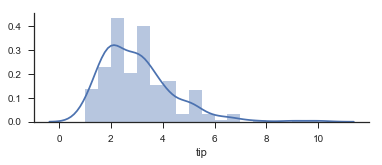

In [25]:
plt.figure(figsize=(6,2))      # mudar o tamanho
sns.distplot(gorjetas['tip'])
sns.despine()

# para remover todas seria: sns.despine(bottom = False, left= False)

As opções de contexto são:  "notebook" (padrão), "paper", "talk", e "poster"

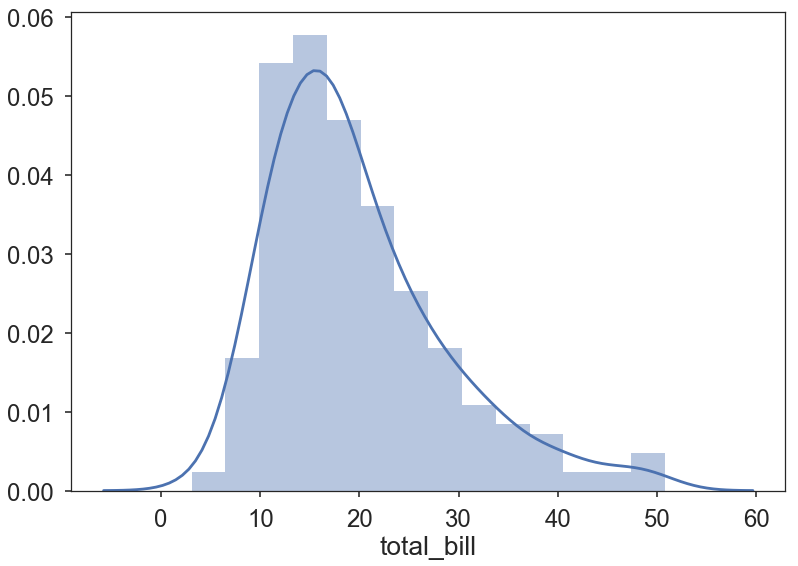

In [26]:
# font_scale muda o tamanho da fonte
sns.set_context('poster', font_scale=1.5) 
sns.distplot(gorjetas['total_bill'])

Para conhecer todas as opções de esquema de cores:  <a href= 'https://matplotlib.org/examples/color/colormaps_reference.html'> " MATPLOTLIB COLORMAP"</a>

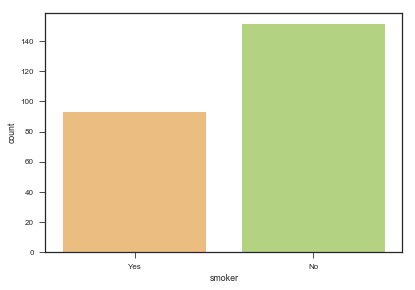

In [27]:
sns.set_context('paper')
sns.countplot(gorjetas['smoker'], palette ='RdYlGn')